In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import datetime
import wordcloud
import japanize_matplotlib
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
font_path = '~/../../usr/share/fonts/truetype/ipaexg00401/ipaexg.ttf'


# 0. Load data

In [4]:
candidates_df = pd.read_pickle("data/candidates_df.p")
tweets_df = pd.read_pickle("data/tweets_df.p")

In [5]:
tweets_df['length'] = tweets_df.tweet.apply(lambda x: len(x)) # emojis may be counted as more than 1 letter
tweet_counts = tweets_df.groupby("id").agg({'id':'count', 'length':'mean'}).rename(columns={'id':'tweet_count', 'length': 'mean_tweet_len'})
candidates_df = candidates_df.join(tweet_counts, how='left', on='twitter_id')
candidates_df.tweet_count = candidates_df.tweet_count.fillna(0)
candidates_df.mean_tweet_len = candidates_df.mean_tweet_len.fillna(0)

In [6]:
candidates_df.age = candidates_df.age.astype(int)
bins = list(range(10, 109, 10))
candidates_df['age_cat'] = pd.cut(candidates_df.age, bins, right=False, labels=[str(bin)+"代" for bin in bins[:-1]])

In [7]:
candidates_w_tweets = candidates_df[(candidates_df.twitter_id != "NA") & (candidates_df.tweet_count > 0)].reset_index()

In [8]:
party_palette = {
    "自由民主党": "#e70112", "立憲民主党": "#024197", "無所属": "#DFDFDF", "日本共産党": "#4d78d4", "公明党": "#f55881", 
    "日本維新の会": "#37c200", "江戸川・生活者ネットワーク": "#37498D", "政治家女子48党": "#ffef00", "れいわ新選組": "#e4027e",
    "参政党": "#D85D0F", "国民民主党": "#fbbe00", "あたらしい党": "#7d7d7d", "目覚めよ日本党": "#7d7d7d"
    }

In [9]:
party_palette_en = {
    "LDP": "#e70112", "CDP": "#024197", "Unaffiliated": "#DFDFDF", "JCP": "#4d78d4", "NKP": "#f55881", 
    "Ishin": "#37c200", "Edogawa Seikatsusha Network": "#37498D", "Joshi": "#ffef00", "Reiwa": "#e4027e",
    "Sansei": "#D85D0F", "DPP": "#fbbe00", "Atarashii": "#7d7d7d", "Mezameyo Nihon": "#7d7d7d"
    }

# 1. Candidates

## 1.1. Mayor candidates 

In [10]:
m_candidates = candidates_df[candidates_df.category == "M"]

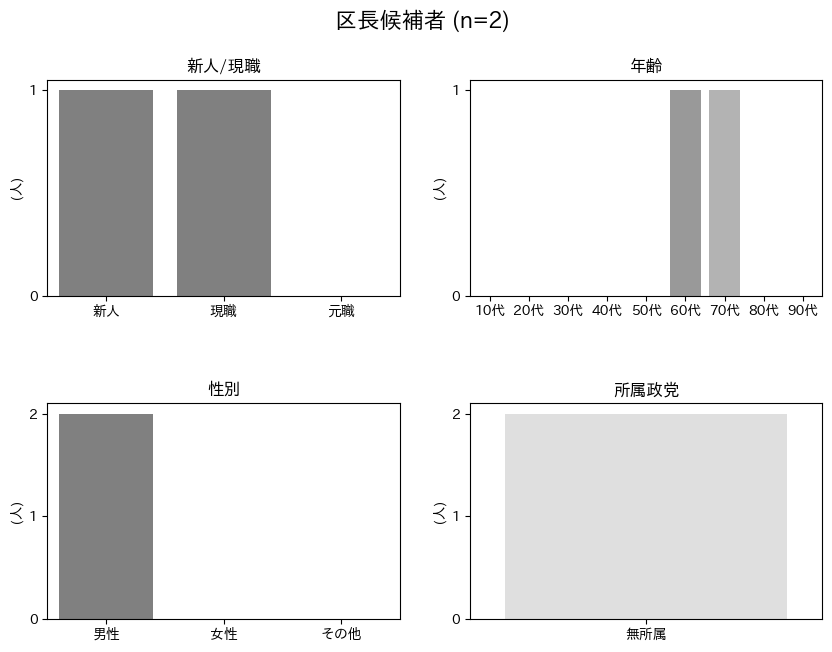

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,7))
fig.suptitle(f'区長候補者 (n={len(m_candidates)})', fontsize=16)
plt.subplots_adjust(hspace=.5)

sns.countplot(m_candidates, x='new_old', ax=axs[0,0], order=['新人', '現職', '元職'], color='grey')
sns.countplot(m_candidates, x='age_cat', ax=axs[0,1], palette='gray')
sns.countplot(m_candidates, x='sex', ax=axs[1,0], order=['M', 'F', 'NA'], color='grey')
sns.countplot(
    m_candidates, x='party', ax=axs[1,1], 
    palette=party_palette,
    )

axs[0,0].set_title("新人/現職")
axs[0,1].set_title("年齢")
axs[1,0].set_title("性別")
axs[1,0].set_xticklabels(["男性", "女性", "その他"])
axs[1,1].set_title("所属政党")
axs[0,0].set_xlabel("")
axs[0,1].set_xlabel("")
axs[1,0].set_xlabel("")
axs[1,1].set_xlabel("")
axs[0,0].set_ylabel("(人)")
axs[0,1].set_ylabel("(人)")
axs[1,0].set_ylabel("(人)")
axs[1,1].set_ylabel("(人)")
axs[0,0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,1].yaxis.set_major_locator(MaxNLocator(integer=True))

## 1.2. Assembly candidates 

In [12]:
a_candidates = candidates_df[candidates_df.category == "A"]

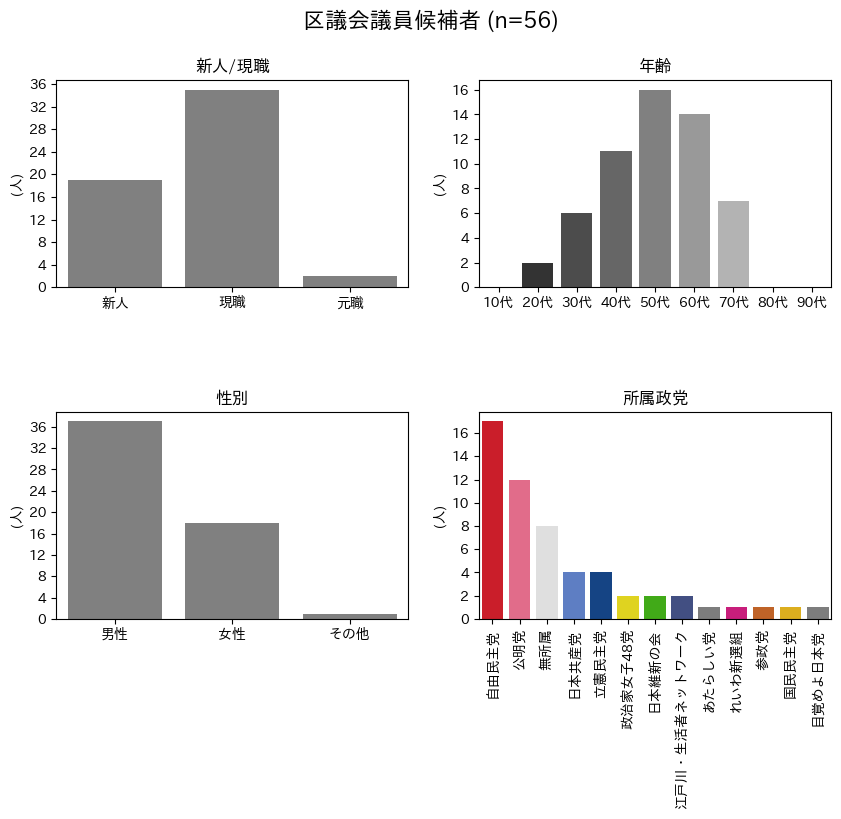

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,7))
fig.suptitle(f'区議会議員候補者 (n={len(a_candidates)})', fontsize=16)
plt.subplots_adjust(hspace=.6)

sns.countplot(a_candidates, x='new_old', ax=axs[0,0], order=['新人', '現職', '元職'], color='grey')
sns.countplot(a_candidates, x='age_cat', ax=axs[0,1], palette='gray')
sns.countplot(a_candidates, x='sex', ax=axs[1,0], order=['M', 'F', 'NA'], color='grey')
sns.countplot(
    a_candidates, x='party', ax=axs[1,1], 
    palette=party_palette,
    order=a_candidates.groupby("party").agg({'name':'count'}).sort_values('name', ascending=False).index,
)

axs[0,0].set_title("新人/現職")
axs[0,1].set_title("年齢")
axs[1,0].set_title("性別")
axs[1,0].set_xticklabels(["男性", "女性", "その他"])
axs[1,1].set_title("所属政党")
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=90)
axs[0,0].set_xlabel("")
axs[0,1].set_xlabel("")
axs[1,0].set_xlabel("")
axs[1,1].set_xlabel("")
axs[0,0].set_ylabel("(人)")
axs[0,1].set_ylabel("(人)")
axs[1,0].set_ylabel("(人)")
axs[1,1].set_ylabel("(人)")
axs[0,0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,1].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,1].yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

## 1.3. Tweets (all candidates with tweets)

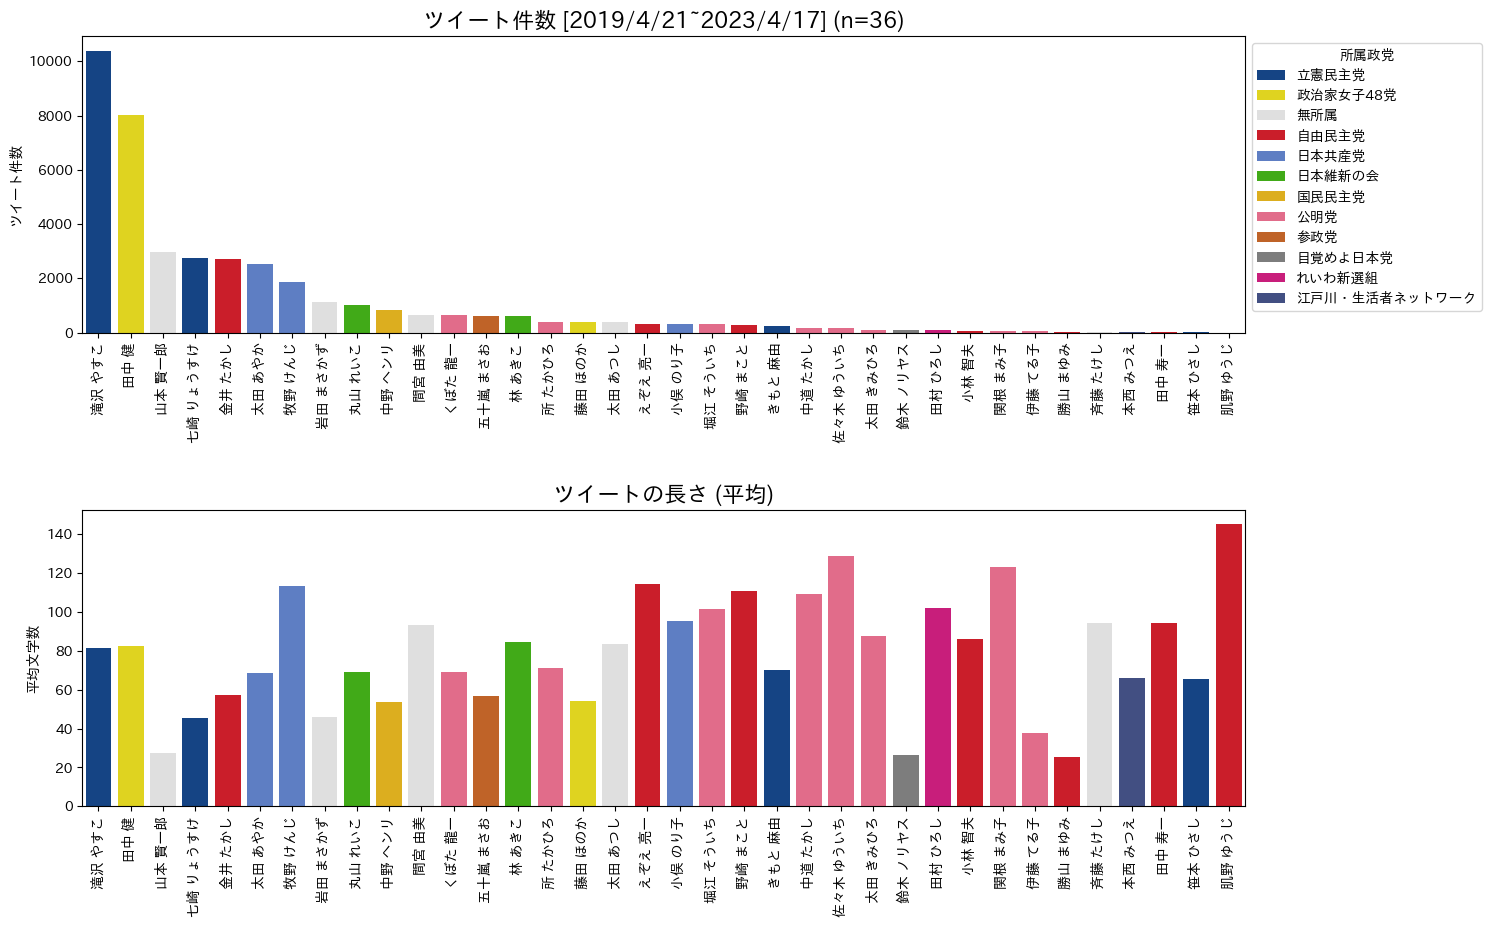

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
plt.subplots_adjust(hspace=.6)

sns.barplot(
    candidates_w_tweets.sort_values('tweet_count', ascending=False), x='name', y='tweet_count',
    hue='party',
    dodge=0,
    palette=party_palette,
    ax=axs[0],
    )

axs[0].set_xticklabels(candidates_w_tweets.sort_values('tweet_count', ascending=False)['name'], rotation=90)
axs[0].set_xlabel('')
axs[0].set_ylabel('ツイート件数')
axs[0].set_title(f"ツイート件数 [2019/4/21~2023/4/17] (n={len(candidates_w_tweets)})", fontsize=16)
axs[0].legend(
    bbox_to_anchor=(1, 1),
    title="所属政党"
    )

sns.barplot(
    candidates_w_tweets.sort_values('tweet_count', ascending=False), 
    x='name', y='mean_tweet_len', ax=axs[1], 
    hue='party',
    dodge=0,
    palette=party_palette,
    )
axs[1].set_xticklabels(candidates_w_tweets.sort_values('tweet_count', ascending=False)['name'], rotation=90)
axs[1].set_xlabel('')
axs[1].set_ylabel('平均文字数')
axs[1].set_title("ツイートの長さ (平均)", fontsize=16)
axs[1].get_legend().remove()

plt.show()

In [15]:
monthly_count = tweets_df.set_index('time').groupby('id').resample('M').agg({'tweet_id': 'count'}).reset_index()
monthly_count = monthly_count.join(candidates_df.set_index('twitter_id')[['party', 'name']], how='left', on='id')

In [16]:
month_label = []
# start = datetime.datetime.strptime(monthly_count.year_month.min(), '%Y-%m')
# end = datetime.datetime.strptime(monthly_count.year_month.max(), '%Y-%m')

start = tweets_df.time.min()
end = tweets_df.time.max()
print(start, end)

while start <= end:
    month_label.append(start.strftime('%Y-%m'))
    start += datetime.timedelta(days=31)

2019-04-21 07:11:52 2023-04-16 23:59:21


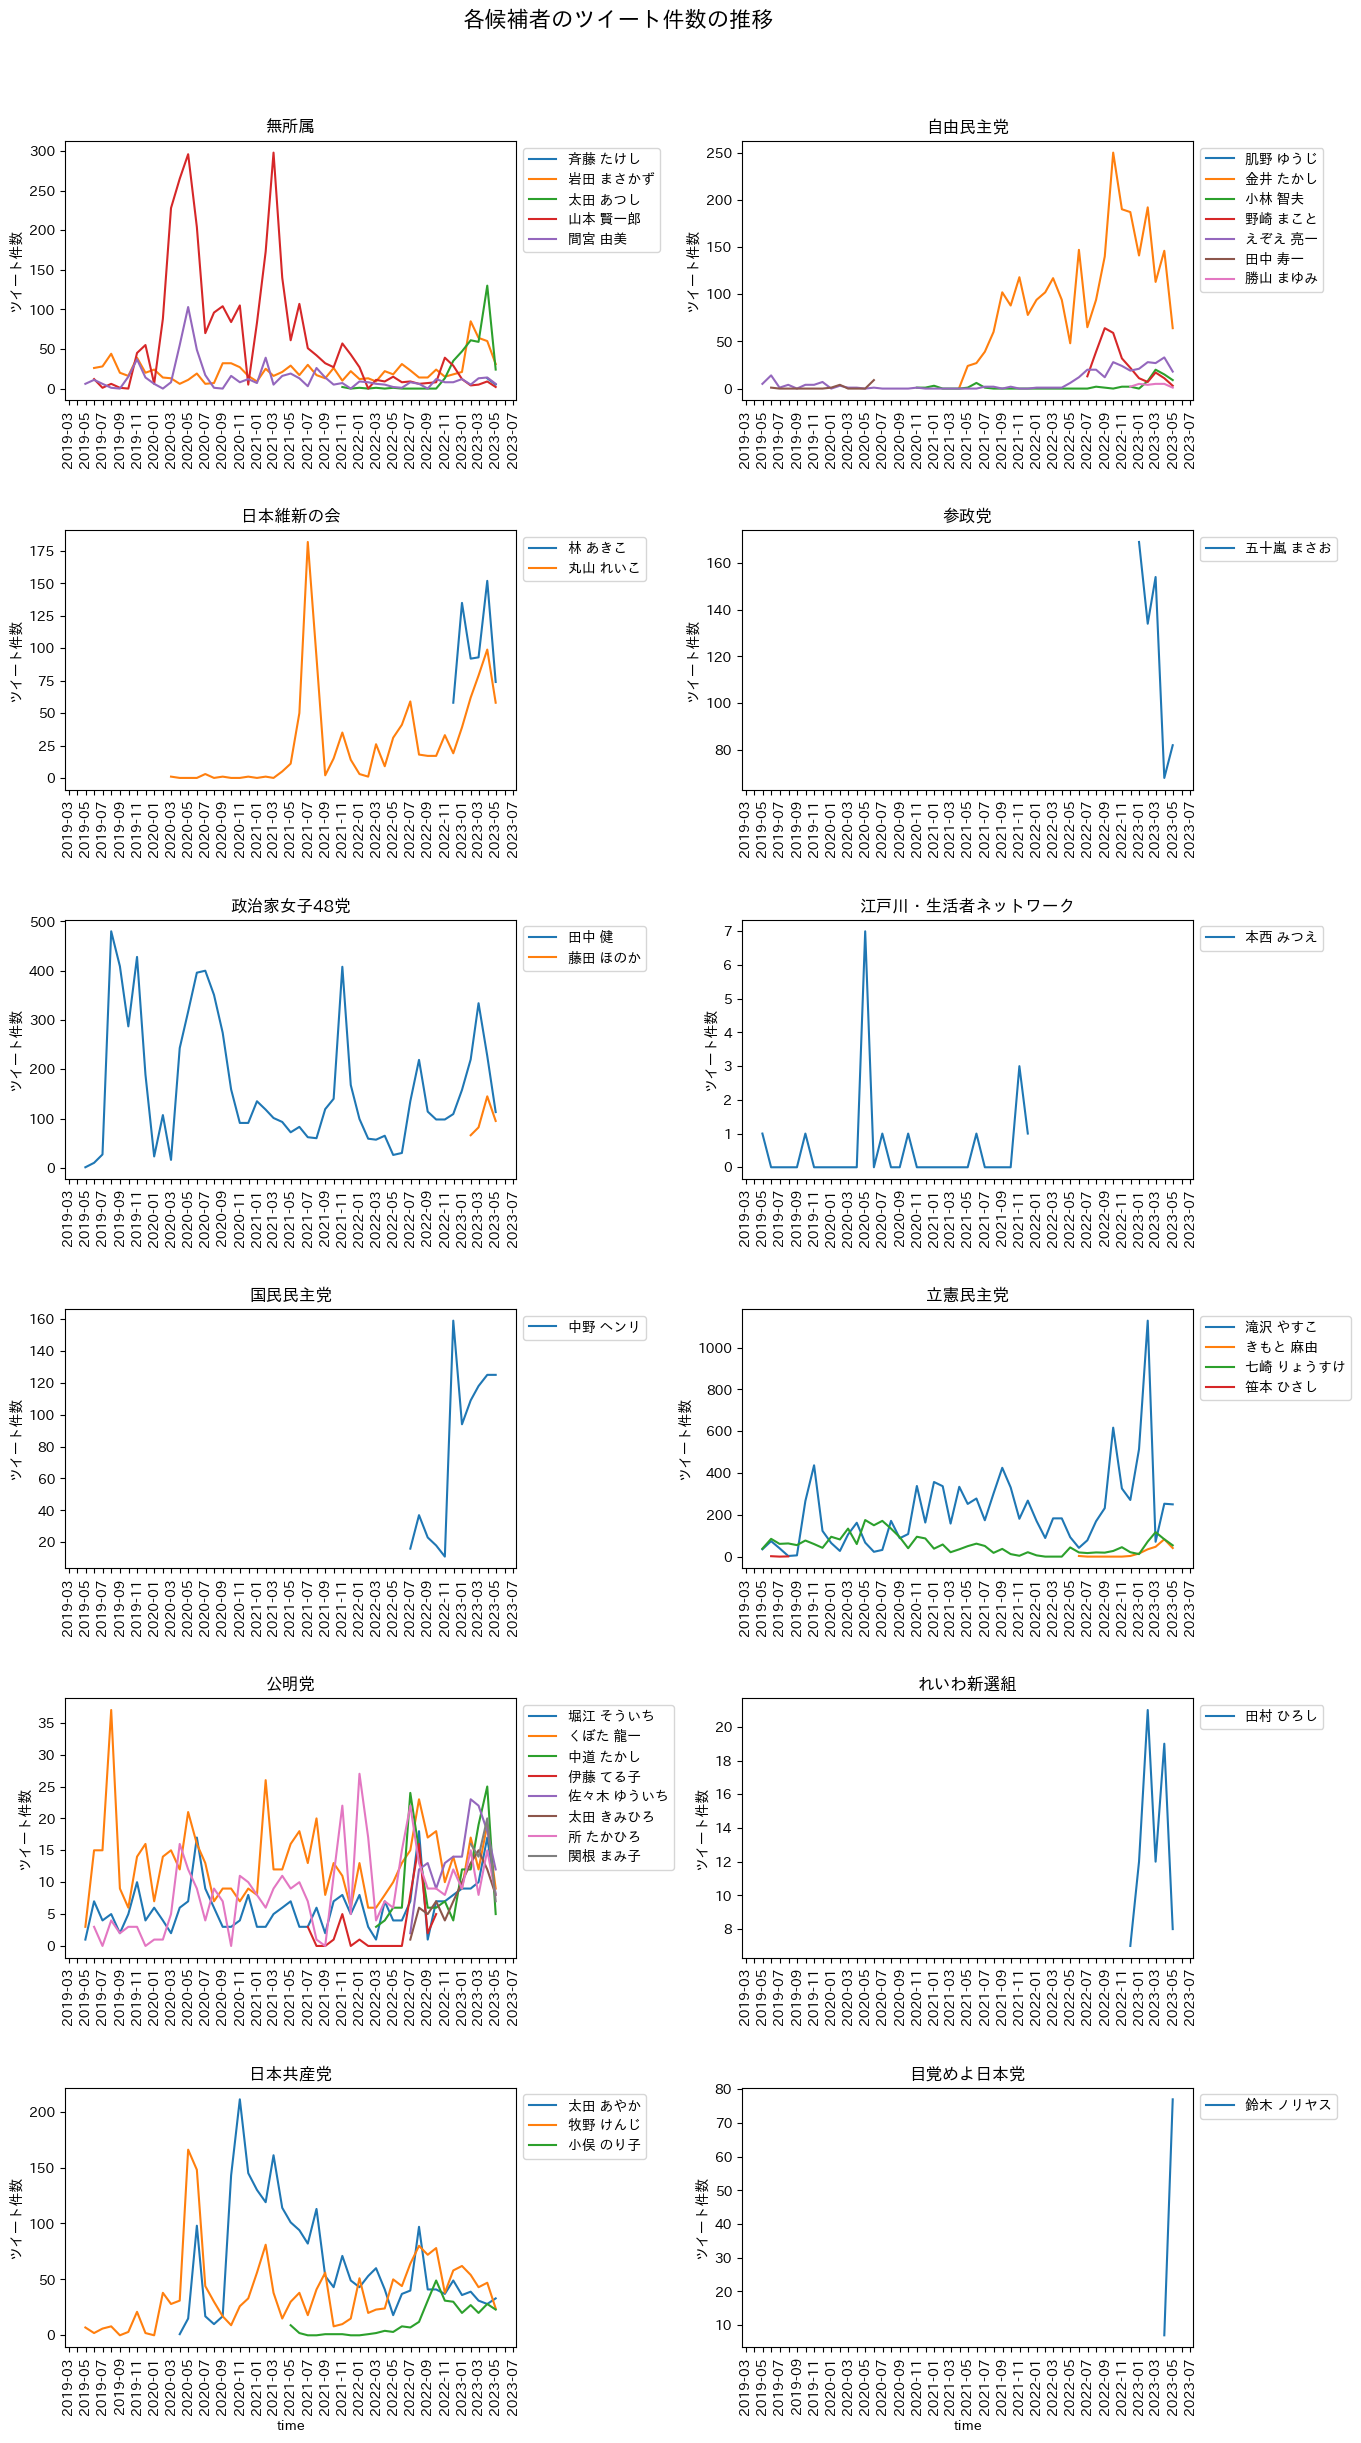

In [27]:
fig, axs = plt.subplots(6,2, figsize=(12, 25), sharex='all')
fig.suptitle("各候補者のツイート件数の推移", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=.5, wspace=.5)

for i, party in enumerate(candidates_w_tweets.party.unique()):
    r = i // 2
    c = i % 2
    sns.lineplot(
        monthly_count[monthly_count.party == party],
        x = 'time',
        y = 'tweet_id',
        hue = 'name',
        ax = axs[r, c],
    )
    
    axs[r,c].xaxis.set_tick_params(which='both', labelbottom=True)
    locator = mdates.MonthLocator()
    fmt = mdates.DateFormatter('%Y-%m')
    axs[r,c].xaxis.set_major_locator(locator)
    axs[r,c].xaxis.set_major_formatter(fmt)
    label = axs[r,c].get_xticklabels()
    axs[r,c].set_xticklabels([l if i % 2 == 0 else '' for i, l in enumerate(label)], rotation=90)
    axs[r,c].legend(
        bbox_to_anchor=(1, 1),
        loc='upper left'
        )
    
    axs[r,c].set_ylabel("ツイート件数")
    
    axs[r,c].set_title(f"{party}")
    

In [37]:
fig, axs = plt.subplots(18, 2, figsize=(12, 50))
plt.subplots_adjust(hspace=.1)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("ワードクラウド", fontsize=16)
plt.subplots_adjust(wspace=.25)
for index, row in candidates_w_tweets.sort_values('party').iterrows():
    data = tweets_df[tweets_df.id == row['twitter_id']].tweet_token.values
    tweets = " ".join([" ".join(tweet) for tweet in data])
    wc = wordcloud.WordCloud(
        background_color='black', width=1000, height=500, font_path=font_path,
        ).generate(tweets)
    r = index // 2
    c = index % 2
    axs[r, c].imshow(wc)
    axs[r, c].set_title(f"{row['twitter_id']} - {row['name']} ({row['party']})")
    axs[r, c].tick_params(
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
        )
